Dear Participant,

Please find below the Project 1 for Unsupervised Learning course. This is an individual assignment. Kindly submit it before it's deadline.

The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables. 

Dataset: cars-dataset.csv

Attribute Information:

Car Name – Name of the car

Cyl – No of cylinders in the car – Multivalued discrete

Disp – Displacement – continuous

Hp – Horsepower – continuous

Wt – Weight – continuous

Acc – Accleration – continuous

Yr – Model of the car – Multivalued discrete

Steps to follow:

EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points
Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points
Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)
Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)
Please note: Since going forward, you will be pushing all your assessment files to the same repository for the remainder of the program, so it is important that you follow some name structure to identify your assessment submission properly.

Please name your file in the following format - CourseName_ResidencyNumber_ProjectNo_Title.ipynb

For Ex - Unsupervised Learning_R4_Project1_Car mpg.ipynb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DF=pd.read_csv('cars-dataset.csv')
DF.head(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,220,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,215,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,225,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190,3850,8.5,70,15.0


# EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

In [3]:
DF.describe()

,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


In [4]:
# Mean is greater than median for cyl,disp,wt i.e. these right skewed distribution

In [5]:
# hp column is not shown in describe => This means it has non-numeric values. We will replace non-numeric values by Nan
DF = DF.replace('?', np.nan) 

In [6]:
DF.isnull().sum()

car name    0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [7]:
DF['hp'] = DF['hp'].astype('float64')

In [8]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [9]:
DF.fillna(DF.median(),inplace=True)

In [10]:
DF.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [11]:
# Car name is not useful column so we can drop this column 
DF.drop('car name',inplace=True,axis=1)
DF.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
1,8,350.0,165.0,3693,11.5,70,15.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0


In [12]:
# Cardinality of the columns - 
DF.apply(lambda x: len(x.unique()))

cyl       5
disp     82
hp       94
wt      351
acc      95
yr       13
mpg     129
dtype: int64

# Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

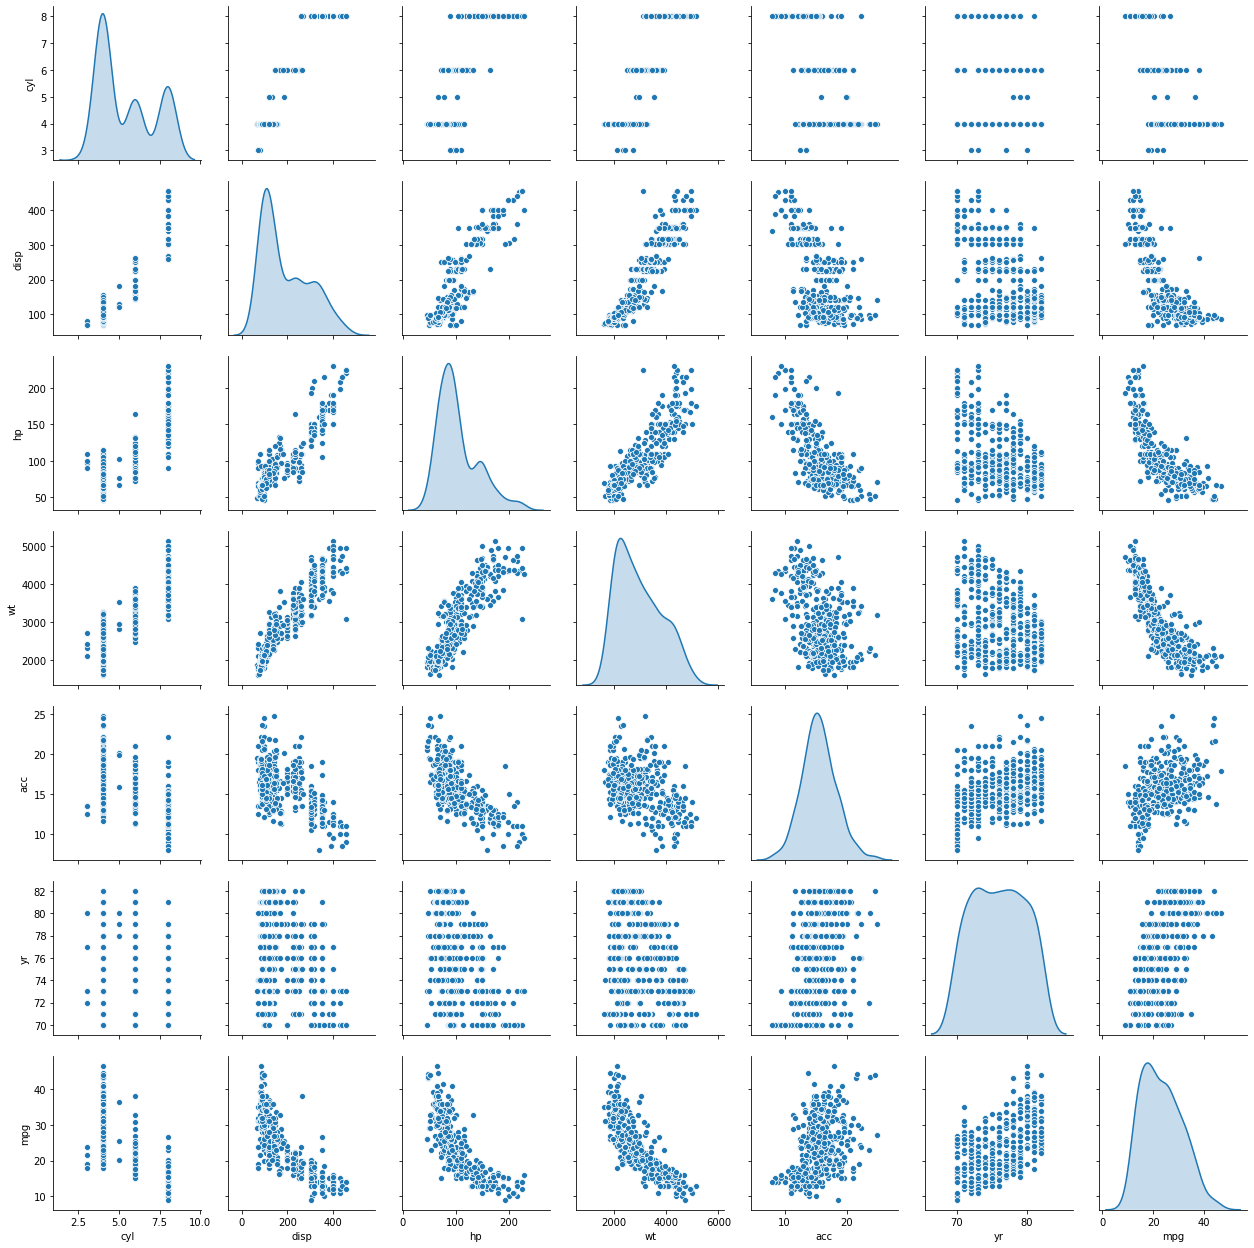

In [13]:
sns.pairplot(DF,diag_kind='kde')

In [14]:
# From above pairplot, there are 3 to 9 clusters 

# Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

In [15]:
from scipy.stats import zscore

In [16]:
DF_scaled = DF.apply(zscore)

In [17]:
DF_scaled.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543


In [18]:
DF_X=DF_scaled.drop('mpg',axis=1)
DF_Y=DF_scaled['mpg']

In [19]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 10)
cluster_errors = []
for num_clusters in cluster_range:
     clusters = KMeans( num_clusters, n_init = 5)
     clusters.fit(DF_X)
     labels = clusters.labels_                   
     centroids = clusters.cluster_centers_       
     cluster_errors.append( clusters.inertia_ )  
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

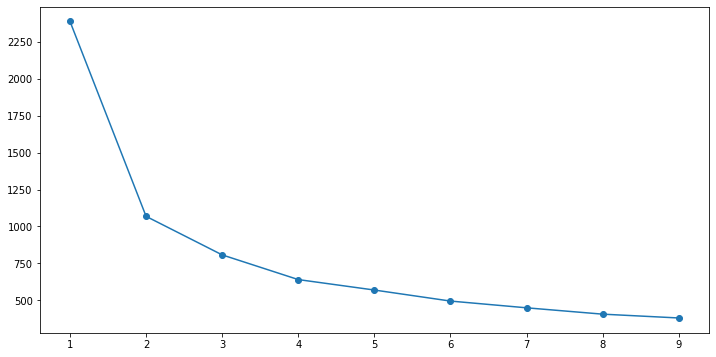

In [20]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [21]:
# From above elbov plot, optimum number of clusters = 3

In [22]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)
kmeans.fit(DF_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [23]:
# Add lable column to dataframe
prediction=kmeans.predict(DF_X)
DF_scaled["Label"] = prediction
DF_scaled.head()

,cyl,disp,hp,wt,acc,yr,mpg,Label
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439,2
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751,2
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439,2
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647,2
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,2


In [24]:
DF_scaled['Label'].value_counts()

0    210
2     95
1     93
Name: Label, dtype: int64

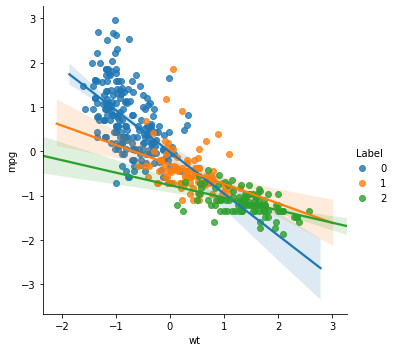

In [25]:
sns.lmplot(x="wt", y="mpg", hue="Label", data=DF_scaled)

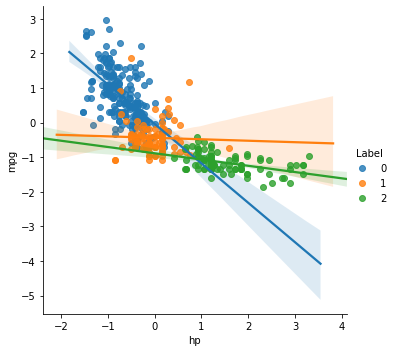

In [26]:
sns.lmplot(x="hp", y="mpg", hue="Label", data=DF_scaled) 

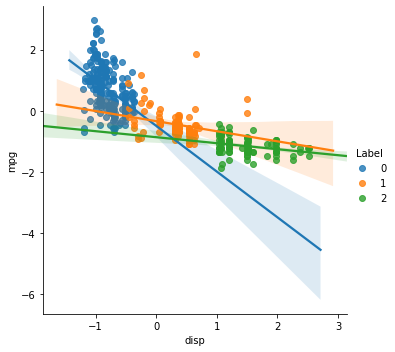

In [27]:
sns.lmplot(x="disp", y="mpg", hue="Label", data=DF_scaled)

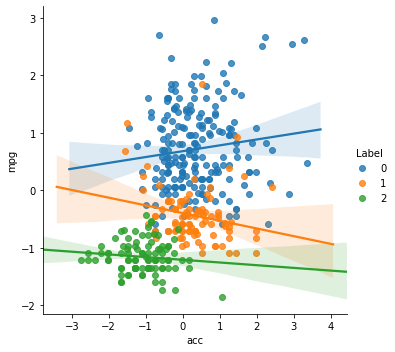

In [28]:
sns.lmplot(x="acc", y="mpg", hue="Label", data=DF_scaled)

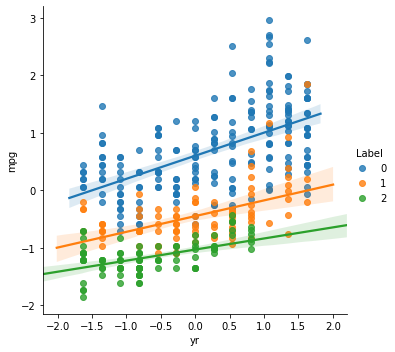

In [29]:
sns.lmplot(x="yr", y="mpg", hue="Label", data=DF_scaled)

In [30]:
DF_copy = DF_scaled.copy(deep = True)

In [31]:
# Split Dataframe based on labels 
DF_small   = DF_scaled.drop(DF_scaled[(DF_scaled['Label']==1) | (DF_scaled['Label']==2)].index,axis=0)
DF_medium  = DF_scaled.drop(DF_scaled[(DF_scaled['Label']==0) | (DF_scaled['Label']==2)].index,axis=0)
DF_large   = DF_scaled.drop(DF_scaled[(DF_scaled['Label']==0) | (DF_scaled['Label']==1)].index,axis=0)
DF_medium_large = DF_scaled.drop(DF_scaled[(DF_scaled['Label']==0)].index,axis=0)

In [32]:
DF_medium_large['Label'].value_counts()

2    95
1    93
Name: Label, dtype: int64

In [33]:
DF_small.head()

,cyl,disp,hp,wt,acc,yr,mpg,Label
14,-0.856321,-0.772295,-0.243723,-0.707544,-0.206262,-1.627426,0.062185,0
18,-0.856321,-0.925936,-0.427091,-0.993671,-0.387801,-1.627426,0.446497,0
19,-0.856321,-0.925936,-1.527300,-1.342463,1.790672,-1.627426,0.318393,0
20,-0.856321,-0.801103,-0.453287,-0.352841,0.701436,-1.627426,0.190289,0
21,-0.856321,-0.829911,-0.374700,-0.638968,-0.387801,-1.627426,0.062185,0


In [34]:
# Split Dataframe based on labels 
DF_small   = DF_small.drop('Label',axis=1)
DF_medium  = DF_medium.drop('Label',axis=1)
DF_large   = DF_large.drop('Label',axis=1)

# Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

# Applying Model on small car

In [35]:
from sklearn.linear_model import LinearRegression

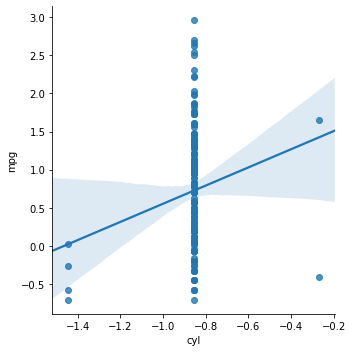

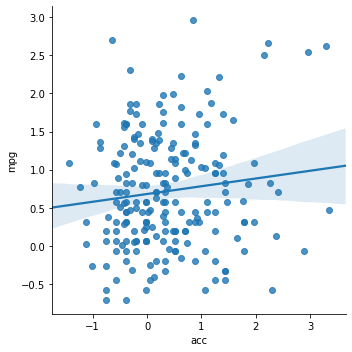

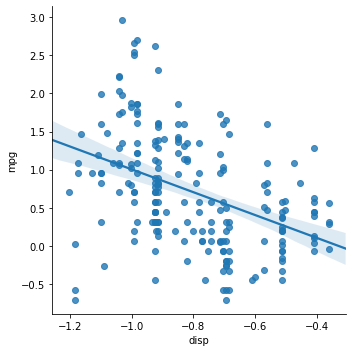

In [36]:
sns.lmplot(x="cyl", y="mpg", data=DF_small) 
sns.lmplot(x="acc", y="mpg", data=DF_small) 
sns.lmplot(x="disp", y="mpg", data=DF_small) 

In [37]:
X_small=DF_small.drop('mpg',axis=1)
y_small=DF_small[['mpg']]

In [38]:
from sklearn.ensemble import RandomForestRegressor
rfcl = RandomForestRegressor(n_estimators = 8)
rfcl = rfcl.fit(X_small, y_small)
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_small.columns))

           Imp
cyl   0.010939
disp  0.071100
hp    0.102805
wt    0.381927
acc   0.078522
yr    0.354707


C:\Users\nitis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
DF_small1   = DF_small.drop('cyl',axis=1)

In [40]:
X_small=DF_small1.drop('mpg',axis=1)
y_small=DF_small1[['mpg']]

In [41]:
# Split 0th cluster as 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.20, random_state=1)

In [42]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
   
# Coefficients of all input features  - 
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for disp is -0.18140844789182675
The coefficient for hp is -0.36488435836034977
The coefficient for wt is -0.7552487508558964
The coefficient for acc is 0.025502785145722386
The coefficient for yr is 0.42708049516190244


In [43]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.3926572536248788


In [44]:
regression_model.score(X_test, y_test) * 100

71.36265192447698

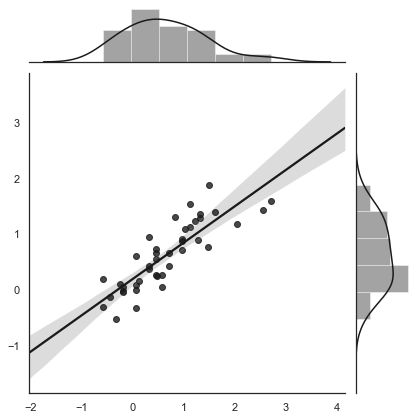

In [45]:
y_pred = regression_model.predict(X_test)
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [46]:
from sklearn.ensemble import AdaBoostRegressor
abcl = AdaBoostRegressor(base_estimator=regression_model, n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)
test_pred = abcl.predict(X_test)
abcl.score(X_test , y_test) * 100

C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


70.97227168006708

# Applying Model on Medium_large car since data size very small on medium and large cars

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
DF_medium_large.head()

,cyl,disp,hp,wt,acc,yr,mpg,Label
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439,2
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751,2
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439,2
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647,2
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,2


In [49]:
DF_medium_large.shape

(188, 8)

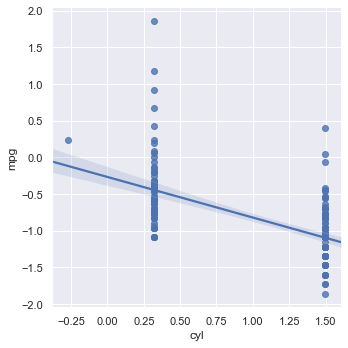

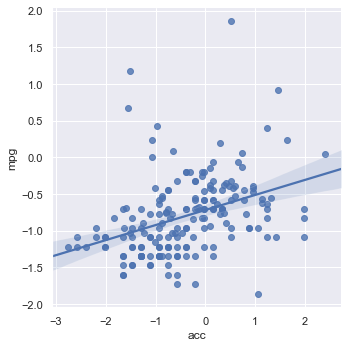

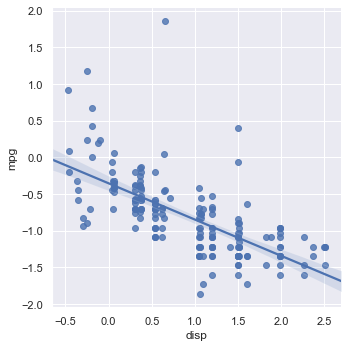

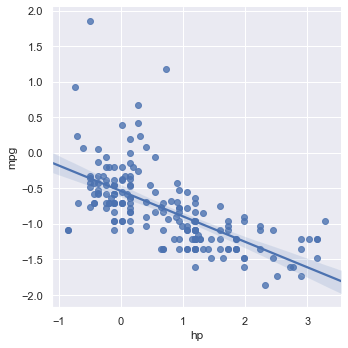

In [50]:
sns.lmplot(x="cyl", y="mpg", data=DF_medium_large) 
sns.lmplot(x="acc", y="mpg", data=DF_medium_large) 
sns.lmplot(x="disp", y="mpg", data=DF_medium_large) 
sns.lmplot(x="hp", y="mpg", data=DF_medium_large)

In [51]:
X=DF_medium_large.drop('mpg',axis=1)
y=DF_medium_large[['mpg']]

In [52]:
#from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(degree=2, interaction_only=True)
#X_poly = poly.fit_transform(X)

In [53]:
from sklearn.ensemble import RandomForestRegressor
rfcl = RandomForestRegressor(n_estimators = 10)
rfcl = rfcl.fit(X, y)
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X.columns))

            Imp
cyl    0.002258
disp   0.056983
hp     0.212683
wt     0.124767
acc    0.065738
yr     0.254382
Label  0.283190


C:\Users\nitis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
# Based on feature importance, we will drop cyl, acc and hp columns 
DF_medium_large1  = DF_medium_large.drop(['cyl'],axis=1)
X=DF_medium_large1.drop('mpg',axis=1)
y=DF_medium_large1[['mpg']]

In [55]:
X.shape

(188, 6)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [57]:
X_train.shape

(131, 6)

In [58]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
   
# Coefficients of all input features  - 
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for disp is 0.09243004141092961
The coefficient for hp is -0.09156877689207653
The coefficient for wt is -0.2933164836337166
The coefficient for acc is -0.08759089307734311
The coefficient for yr is 0.260716842045374
The coefficient for Label is -0.3195662190045448


In [59]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.040327738638508026


In [60]:
regression_model.score(X_test, y_test) * 100

72.8265351335894

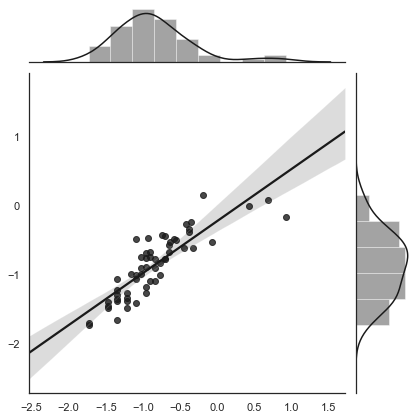

In [61]:
y_pred = regression_model.predict(X_test)
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [62]:
from sklearn.ensemble import AdaBoostRegressor
abcl = AdaBoostRegressor(base_estimator=regression_model, n_estimators=50,random_state=10)
abcl = abcl.fit(X_train, y_train)
test_pred = abcl.predict(X_test)
abcl.score(X_test , y_test) * 100

C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


73.12527251036991